# データ分析入門

## 第8章 区間推定 #10


### パッケージ読み込み

In [1]:
# !pip install japanize_matplotlib
# !pip install sympy

%matplotlib inline
import japanize_matplotlib
from matplotlib import pyplot as plt

from pathlib import Path
import numpy as np
import numpy.matlib
import os
import sys
import codecs
import math
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl import Workbook
import pprint
import datetime

import sympy as sym


### 表データの読み込み（スポーツチームA: 第１章 表1.1）

In [2]:
df1_1 = pd.read_excel('Table1_1.xlsx', index_col=0)
df1_1=df1_1.iloc[:79,:]
df1_1

,x,y,z
No.,,,
1,178,100,33
2,185,90,22
3,190,90,29
4,175,79,27
5,185,81,29
...,...,...,...
75,171,75,26
76,176,78,24
77,185,85,33


In [3]:
df1_2 = pd.read_excel('Table1_2.xlsx', index_col=0)
df1_2

,性別,出身県,資格の級
番号,,,
1,0,5,2
2,1,3,4
3,1,8,2
4,0,14,5
5,1,26,1
6,0,5,3
7,1,17,1
8,1,32,2
9,0,4,4


### 問題10.1

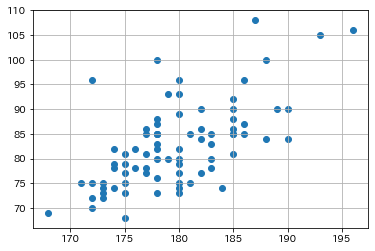

In [4]:
plt.scatter(df1_1.iloc[:,0], df1_1.iloc[:,1])
plt.grid()
plt.show()

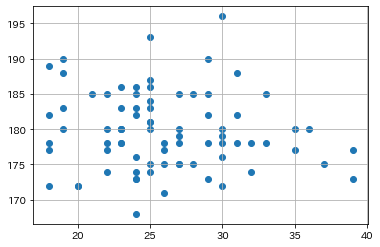

In [5]:
plt.scatter(df1_1.iloc[:,2], df1_1.iloc[:,0])
plt.grid()
plt.show()

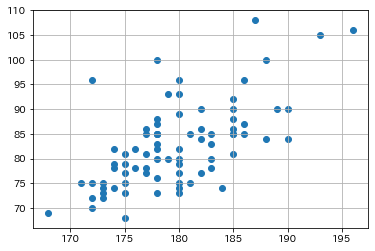

In [6]:
plt.scatter(df1_1['x'].tolist(), df1_1['y'].tolist())
plt.grid()
plt.show()

In [7]:
df1_1['x'].tolist()

[178,
 185,
 190,
 175,
 185,
 196,
 188,
 186,
 188,
 182,
 180,
 176,
 186,
 178,
 177,
 180,
 187,
 175,
 177,
 193,
 186,
 174,
 178,
 177,
 175,
 182,
 183,
 179,
 173,
 182,
 180,
 178,
 178,
 168,
 189,
 174,
 172,
 184,
 185,
 173,
 172,
 183,
 190,
 183,
 180,
 175,
 172,
 182,
 185,
 174,
 178,
 178,
 180,
 178,
 180,
 180,
 181,
 173,
 177,
 181,
 173,
 180,
 183,
 180,
 175,
 185,
 185,
 175,
 178,
 178,
 172,
 178,
 177,
 174,
 171,
 176,
 185,
 179,
 180]

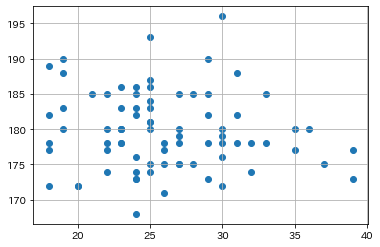

In [8]:
plt.scatter(df1_1['z'].to_numpy(), df1_1['x'].to_numpy())
plt.grid()
plt.show()

In [9]:
xd=df1_1['x'].to_numpy()
yd=df1_1['y'].to_numpy()
zd=df1_1['z'].to_numpy()

mu_x=np.mean(xd)
mu_y=np.mean(yd)
mu_z=np.mean(zd)
display('平均')
display(mu_x)
display(mu_y)
display(mu_z)

var_x0=xd.var(ddof=0) # 標本分散を求める
var_x1=xd.var(ddof=1) #不偏分散を求める

var_y0=yd.var(ddof=0)
var_y1=yd.var(ddof=1)

var_z0=zd.var(ddof=0)
var_z1=zd.var(ddof=1)

display('分散')
display(var_x0)
display(var_x1)

display(var_y0)
display(var_y1)

display(var_z0)
display(var_z1)



'平均'

179.72151898734177

82.75949367088607

26.0126582278481

'分散'

29.416119211664796

29.793248945147678

72.3092453132511

73.23628691983124

24.34161192116648

24.65368386887374

In [10]:
xd_std=(xd-mu_x)/np.sqrt(var_x0)
yd_std=(yd-mu_y)/np.sqrt(var_y0)
zd_std=(zd-mu_z)/np.sqrt(var_z0)


xd_std_m=np.mean(xd_std)
yd_std_m=np.mean(yd_std)
zd_std_m=np.mean(zd_std)

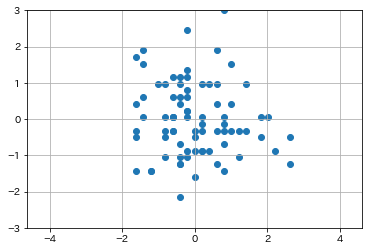

In [11]:
plt.scatter(zd_std, xd_std)
plt.grid()
plt.axis('equal')
# plt.xlim([-3.5, 3.5])
# plt.ylim([-3.5, 3.5])
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

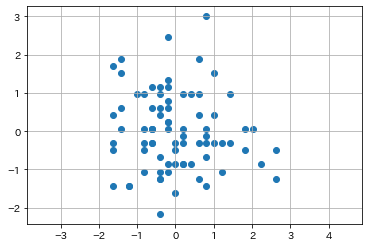

In [12]:
plt.scatter(zd_std, xd_std)
plt.grid()
plt.axis('equal')
plt.show()

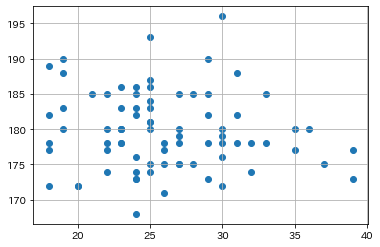

In [13]:
plt.scatter(df1_1['z'].to_numpy(), df1_1['x'].to_numpy())
plt.grid()
plt.show()

In [14]:
xd_std=(xd-mu_x)/np.sqrt(var_x0)
yd_std=(yd-mu_y)/np.sqrt(var_y0)
zd_std=(zd-mu_z)/np.sqrt(var_z0)


xd_std_m=np.mean(xd_std)
yd_std_m=np.mean(yd_std)
zd_std_m=np.mean(zd_std)

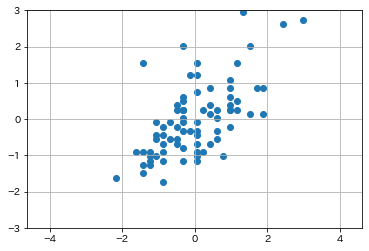

In [15]:
plt.scatter(xd_std, yd_std)
plt.grid()
plt.axis('equal')
# plt.xlim([-3.5, 3.5])
# plt.ylim([-3.5, 3.5])
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

In [16]:
(xd_std-xd_std_m)*(yd_std-yd_std_m)

array([-6.43535087e-01,  8.28682749e-01,  1.61364603e+00,  3.84876590e-01,
       -2.01375703e-01,  8.20294614e+00,  3.09464667e+00,  5.77274931e-01,
        2.22669143e-01, -2.84537896e-01, -4.58595877e-03,  6.12850854e-02,
        3.05007949e-01, -1.95611987e-01,  3.39864709e-01, -3.47768540e-02,
        3.98335684e+00,  1.51099698e+00,  2.80855232e-01,  6.40329432e+00,
        1.80247635e+00,  5.90449140e-01, -8.36312117e-02,  1.03826801e-01,
        1.80127427e-01,  1.60091652e-01, -1.96160912e-01, -1.60206301e-01,
        1.27660585e+00,  6.12850854e-02,  3.76812945e-02,  1.03003413e-01,
       -8.36312117e-02,  3.49700896e+00,  1.45665337e+00,  1.08667767e+00,
        1.80137850e+00, -8.12604100e-01,  5.99780871e-01,  1.56808522e+00,
        1.29911179e+00, -3.38332582e-01,  2.76463830e-01,  1.70965933e-02,
       -1.66623169e-02,  5.89625752e-01, -2.21675519e+00,  3.57704784e-01,
        1.05758463e+00,  4.66392007e-01,  2.83495633e-02, -8.97736171e-03,
       -5.89295702e-02,  

In [17]:
len(xd_std)

79

In [18]:
np.sum((xd_std-xd_std_m)*(yd_std-yd_std_m))/len(xd_std)

0.6369479824166495

In [19]:
dN=np.shape(df1_1)[1]
rowN=int(dN*(dN-1)/2)
colN=2
table10_5=np.full((rowN,colN),0.0)

table10_5

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [20]:
columnsName=['共分散', '相関係数']
indexName=['身長と体重', '年齢と身長', '年齢と体重']

In [21]:
table10_5[0,0]=np.sum((xd-mu_x)*(yd-mu_y))/len(xd_std)
table10_5[1,0]=np.sum((zd-mu_z)*(xd-mu_x))/len(xd_std)
table10_5[2,0]=np.sum((zd-mu_z)*(yd-mu_y))/len(xd_std)

table10_5[0,1]=np.sum((xd_std-xd_std_m)*(yd_std-yd_std_m))/len(xd_std)
table10_5[1,1]=np.sum((zd_std-zd_std_m)*(xd_std-xd_std_m))/len(xd_std)
table10_5[2,1]=np.sum((zd_std-zd_std_m)*(yd_std-yd_std_m))/len(xd_std)
table10_5

array([[ 2.93760615e+01,  6.36947982e-01],
       [-2.70533568e+00, -1.01100617e-01],
       [-7.31132831e-01, -1.74270832e-02]])

In [22]:
df10_5 = pd.DataFrame(table10_5,
                  columns=columnsName,
                  index=indexName)
df10_5

,共分散,相関係数
身長と体重,29.376062,0.636948
年齢と身長,-2.705336,-0.101101
年齢と体重,-0.731133,-0.017427


In [23]:
dataD1=np.empty((3,1))
dataD1

array([[2.52820473e-314],
       [2.52820497e-314],
       [2.52820459e-314]])

In [24]:
df10_5b = pd.DataFrame(np.zeros((3,2)),
                  columns=columnsName,
                  index=indexName)

dataD1=np.empty((3,1))
dataD1[0,0]=np.sum((xd-mu_x)*(yd-mu_y))/len(xd_std)
dataD1[1,0]=np.sum((zd-mu_z)*(xd-mu_x))/len(xd_std)
dataD1[2,0]=np.sum((zd-mu_z)*(yd-mu_y))/len(xd_std)
display(dataD1)

dataD2=np.empty((3,1))
dataD2[0,0]=np.sum((xd_std-xd_std_m)*(yd_std-yd_std_m))/len(xd_std)
dataD2[1,0]=np.sum((zd_std-zd_std_m)*(xd_std-xd_std_m))/len(xd_std)
dataD2[2,0]=np.sum((zd_std-zd_std_m)*(yd_std-yd_std_m))/len(xd_std)
display(dataD2)

df10_5b.iloc[:,0]=np.round(dataD1,2)
df10_5b.iloc[:,1]=np.round(dataD2,3)

df10_5b

array([[29.37606153],
       [-2.70533568],
       [-0.73113283]])

array([[ 0.63694798],
       [-0.10110062],
       [-0.01742708]])

,共分散,相関係数
身長と体重,29.38,0.637
年齢と身長,-2.71,-0.101
年齢と体重,-0.73,-0.017


### 例10.12

In [25]:
var_xy=np.sum((xd-mu_x)*(yd-mu_y))/len(xd_std)

display(mu_x)
display(mu_y)

display(var_x0)
display(var_y0)
display(var_xy)

fy=lambda x:(var_xy/var_x0)*(x-mu_x)+mu_y
fx=lambda y:(var_xy/var_y0)*(y-mu_y)+mu_x

179.72151898734177

82.75949367088607

29.416119211664796

72.3092453132511

29.37606152860118

In [26]:
np.arange(np.min(df1_1['x']),np.max(df1_1['x']),0.5)
xx=np.arange(np.min(df1_1['x']),np.max(df1_1['x']),0.5)

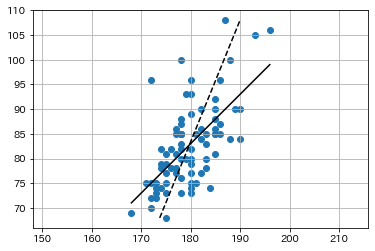

In [27]:
plt.clf()
plt.scatter(df1_1['x'].to_numpy(), df1_1['y'].to_numpy())

xx=np.arange(np.min(df1_1['x']),np.max(df1_1['x'])+0.5,0.5)
plt.plot(xx,fy(xx),'k-')

yy=np.arange(np.min(df1_1['y']),np.max(df1_1['y'])+0.5,0.5)
plt.plot(fx(yy),yy,'k--')

plt.grid()
plt.axis('equal')
plt.xlim([160, 200])
plt.ylim([60, 120])
plt.axis('equal')

plt.show()

### 問題*

### 問題*

### 問題*

### 問題*

### その他